### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [347]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# Set seed for reproducibility
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [348]:

# Parameters, try to change them and see what happens
N_epochs = 25 # number of epochs
sigma =0.1 # noise level
N_train = 2500 # number of training data
N_batch = 32 # batch size
act = 'tanh' # activation function

neur_per_layer = 7 #number of neurons per layer

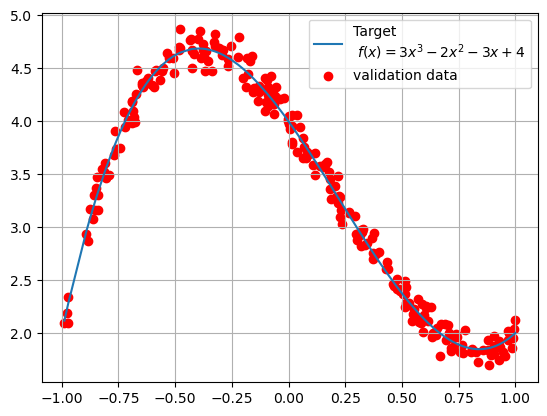

In [349]:
# target parameters of f(x) = 4-3x-2x^2+3x^3
# generate training inputs

# Polynomial function
def polynomial(x):
    return 4 - 3*x - 2*x**2 + 3*x**3

x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, int(0.1*N_train))
x_valid.sort() # for a better plot
y_target = polynomial(x_valid) # ideal (target) linear function

y_train = np.random.normal(polynomial(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(polynomial(x_valid), sigma)

plt.plot(x_valid, y_target, label='Target\n $f(x) = 3x^3 - 2x^2 - 3x + 4$')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

Putting Universal approximation theorem at test:

In [350]:
# compose the NN model

model = tf.keras.Sequential()

layer = 5

model.add(Dense(1, input_shape=(1,)))
model.add(Dense(neur_per_layer, activation=act))
model.add(Dense(neur_per_layer, activation=act))
model.add(Dense(neur_per_layer, activation=act))
model.add(Dense(neur_per_layer, activation=act))
model.add(Dense(neur_per_layer, activation=act))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_202 (Dense)           (None, 1)                 2         
                                                                 
 dense_203 (Dense)           (None, 7)                 14        
                                                                 
 dense_204 (Dense)           (None, 7)                 56        
                                                                 
 dense_205 (Dense)           (None, 7)                 56        
                                                                 
 dense_206 (Dense)           (None, 7)                 56        
                                                                 
 dense_207 (Dense)           (None, 7)                 56        
                                                                 
 dense_208 (Dense)           (None, 1)               

In [351]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=N_batch, epochs=N_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/25
79/79 [==============================] - 0s 2ms/step - loss: 1.3679 - mse: 1.3679 - val_loss: 0.9342 - val_mse: 0.9342
Epoch 2/25
79/79 [==============================] - 0s 773us/step - loss: 0.5436 - mse: 0.5436 - val_loss: 0.3135 - val_mse: 0.3135
Epoch 3/25
79/79 [==============================] - 0s 795us/step - loss: 0.3463 - mse: 0.3463 - val_loss: 0.2559 - val_mse: 0.2559
Epoch 4/25
79/79 [==============================] - 0s 1ms/step - loss: 0.3196 - mse: 0.3196 - val_loss: 0.2258 - val_mse: 0.2258
Epoch 5/25
79/79 [==============================] - 0s 798us/step - loss: 0.2777 - mse: 0.2777 - val_loss: 0.1767 - val_mse: 0.1767
Epoch 6/25
79/79 [==============================] - 0s 769us/step - loss: 0.2100 - mse: 0.2100 - val_loss: 0.1147 - val_mse: 0.1147
Epoch 7/25
79/79 [==============================] - 0s 786us/step - loss: 0.1327 - mse: 0.1327 - val_loss: 0.0682 - val_mse: 0.0682
Epoch 8/25
79/79 [==============================] - 0s 768us/step - loss: 0.0817

In [352]:
# return weights and biases
model.get_weights()

[array([[0.92259115]], dtype=float32),
 array([0.21156912], dtype=float32),
 array([[-0.560198  , -0.79953796, -0.74238515,  0.13729015,  0.3825382 ,
         -0.20142603, -0.1555545 ]], dtype=float32),
 array([-0.08336493,  0.01713928, -0.2220112 , -0.21303532, -0.04910296,
        -0.23421867, -0.09636402], dtype=float32),
 array([[ 0.16869497, -0.569741  ,  0.6401399 ,  0.7006146 ,  0.269623  ,
         -0.11532021,  0.47239947],
        [-0.7223953 , -0.28630444,  0.11127891,  0.18537208, -0.5216781 ,
          0.76715046,  0.59648305],
        [-0.09903692, -0.6587138 ,  0.71736   ,  0.49898234,  0.09338775,
          0.7407047 ,  0.25721812],
        [-0.25454044,  0.0811342 ,  0.41918823,  0.07879931,  0.3812074 ,
         -0.08049342,  0.32486284],
        [ 0.11304058,  0.5266066 , -0.6815753 ,  0.06206034,  0.10771007,
          0.21908197, -0.17589559],
        [-0.09518151,  0.28772143,  0.3931836 , -0.02622529,  0.24680467,
         -0.13146247, -0.50597507],
        [-0.4

In [353]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

8/8 [==============================] - 0s 746us/step - loss: 0.0134 - mse: 0.0134

Test loss: 0.0133857736364007
Test accuracy: 0.0133857736364007


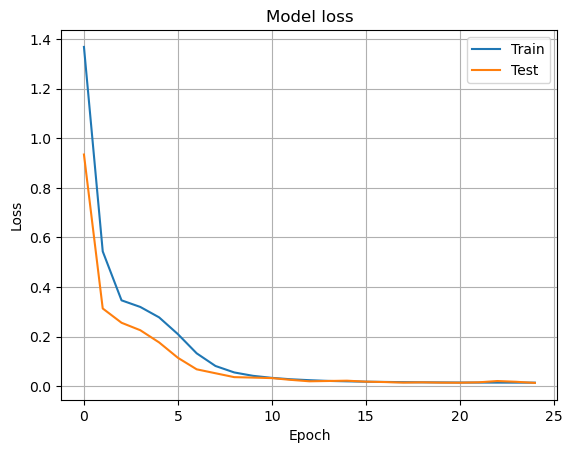

In [354]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

# print data to file
epochs = range(1, len(history.history['loss']) + 1)
data = {
    'epoch': epochs,
    'train_loss': history.history['loss'],
    'val_loss': history.history['val_loss']
}
df = pd.DataFrame(data)
# for single hidden layer
# df.to_csv(f'DATA/polynomial/Neuron/loss{neur_per_layer}.dat', index=False, header = False, sep = ' ')

# for multiple hidden layers with the same height
# df.to_csv(f'DATA/polynomial/layers/loss{layer}.dat', index=False, header = False, sep = ' ')

2/2 [==============================] - 0s 2ms/step


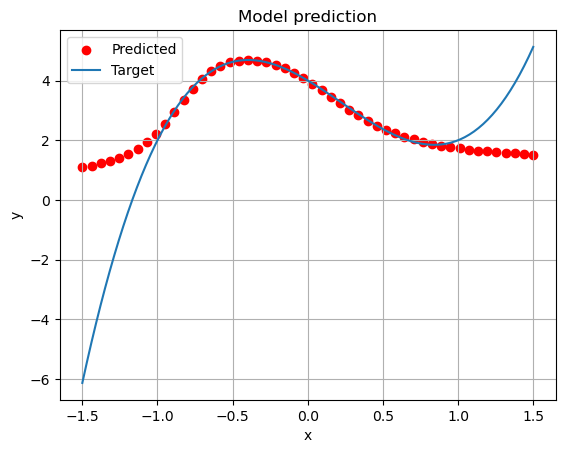

In [355]:
# x_predicted = np.random.uniform(-1, 1, 1000)
x_predicted = np.linspace(-1.5, 1.5, 50)
y_predicted = model.predict(x_predicted)
x_plot = np.linspace(-1.5, 1.5, 100)
y_plot = polynomial(x_plot) 
plt.scatter(x_predicted, y_predicted,color='r', label='Predicted')
plt.plot(x_plot, y_plot, label='Target')
plt.title('Model prediction')
plt.xlabel('x')
plt.ylabel('y')
# plt.xlim(-1,1)
plt.legend()
plt.grid(True)
plt.show()
# Print the data used for training
# for single hidden layer
# pd.DataFrame({'x': x_predicted, 'y': y_predicted.flatten()}).to_csv(f'DATA/polynomial/Neuron/neuron{neur_per_layer}.dat', index=False, header=False, sep=' ')

# for multiple hidden layers with the same height
# pd.DataFrame({'x': x_predicted, 'y': y_predicted.flatten()}).to_csv(f'DATA/polynomial/layers/layers{layer}.dat', index=False, header=False, sep=' ')